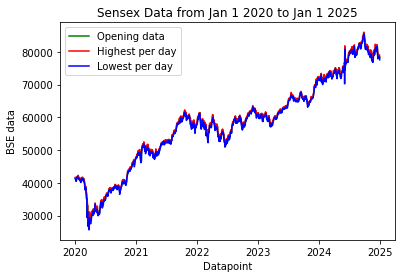

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as stats 
from scipy.stats import chi2 

#plt.style.use('seaborn-colorblind')

# Read data from Excel file
BSE_Sensex = pd.read_csv("C:/Users/ANIRBAN/Downloads/SENSEX_01012020_01012025.csv",parse_dates=True,index_col="Date")




# Extract columns

open_sensex = BSE_Sensex.iloc[:, 0]
high_sensex = BSE_Sensex.iloc[:, 1]
low_sensex = BSE_Sensex.iloc[:, 2]
close_sensex= BSE_Sensex.iloc[:, 3]


# question 1: Plot the (X-axis) acceleration data for motion along the X axis for Acrylic, Aluminium
#and Mild Steel platforms. You may represent the data in a single plot with required
#legends
# Plotting
plt.plot(open_sensex, label='Opening data', color='green')
plt.plot(high_sensex, label='Highest per day', color='red')
plt.plot(low_sensex, label='Lowest per day', color='blue')

# Adding labels and title
plt.xlabel('Datapoint')
plt.ylabel('BSE data')
plt.title('Sensex Data from Jan 1 2020 to Jan 1 2025')

# Adding legend
plt.legend()


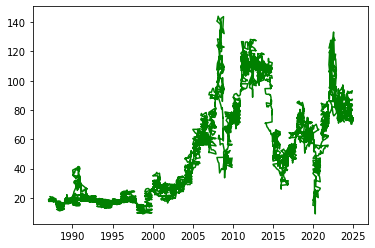

In [2]:
Oil_price = pd.read_csv("C:/Users/ANIRBAN/Downloads/vintages_starting_2025-01-02.csv",parse_dates=True,index_col="Date")

#df = pd.read_csv('data.csv')

new_df = Oil_price.dropna()

price = new_df.iloc[:, 0]

plt.plot(price, label='Opening data', color='green')


In [3]:
inner_join = pd.merge(open_sensex,  
                      new_df,  
                      on ='Date',  
                      how ='inner') 
inner_join 

,Open,DCOILBRENTEU_20250102
Date,,
2020-01-06,41378.34,36.74
2020-01-07,40983.04,42.18
2020-01-09,41216.67,45.72
2020-01-10,41568.20,39.75
2020-01-13,41788.21,64.14
...,...,...
2024-12-23,78488.64,72.12
2024-12-24,78707.37,73.50
2024-12-27,78607.62,73.77


In [4]:
left_join = pd.merge(open_sensex,  
                      new_df,  
                      on ='Date',  
                      how ='left') 
left_join 

,Open,DCOILBRENTEU_20250102
Date,,
2020-01-02,41340.27,NaN
2020-01-03,41634.51,NaN
2020-01-06,41378.34,36.74
2020-01-07,40983.04,42.18
2020-01-08,40574.83,NaN
...,...,...
2024-12-23,78488.64,72.12
2024-12-24,78707.37,73.50
2024-12-27,78607.62,73.77


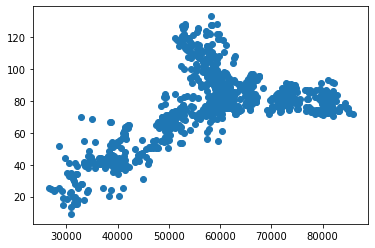

In [5]:
x=np.array(inner_join.iloc[:, 0])
y=np.array(inner_join.iloc[:, 1])

plt.scatter(x, y)
plt.show()

In [7]:
# calculateMahalanobis function to calculate 
# the Mahalanobis distance 
def calculateMahalanobis(y=None, data=None, cov=None): 
  
    y_mu = y - np.mean(data) 
    if not cov: 
        cov = np.cov(data.values.T) 
    inv_covmat = np.linalg.inv(cov) 
    left = np.dot(y_mu, inv_covmat) 
    mahal = np.dot(left, y_mu.T) 
    return mahal.diagonal() 
  

  
# Creating dataset 
df = pd.DataFrame(inner_join,columns=['Open', 'DCOILBRENTEU_20250102']) 
  
# Creating a new column in the dataframe that holds 
# the Mahalanobis distance for each row 
df['calculateMahalanobis'] = calculateMahalanobis(y=df, data=df[[ 
  'Open', 'DCOILBRENTEU_20250102']]) 
  
# Display the dataframe 
print(df) 

# calculate p-value for each mahalanobis distance 
df['p'] = 1 - chi2.cdf(df['calculateMahalanobis'], 3) 
  
# display first five rows of dataframe 
print(df)

                Open  DCOILBRENTEU_20250102  calculateMahalanobis
Date                                                             
2020-01-06  41378.34                  36.74              3.153784
2020-01-07  40983.04                  42.18              2.485916
2020-01-09  41216.67                  45.72              2.119109
2020-01-10  41568.20                  39.75              2.731797
2020-01-13  41788.21                  64.14              1.505493
...              ...                    ...                   ...
2024-12-23  78488.64                  72.12              3.979004
2024-12-24  78707.37                  73.50              3.860537
2024-12-27  78607.62                  73.77              3.787225
2024-12-30  78637.58                  74.24              3.734039
2024-12-31  77982.57                  74.58              3.460651

[1056 rows x 3 columns]
                Open  DCOILBRENTEU_20250102  calculateMahalanobis         p
Date                                     

In [9]:
plt.listplot(df['p'])

AttributeError: module 'matplotlib.pyplot' has no attribute 'listplot'